In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [165]:
df= pd.read_csv('../data/heart_disease.csv')

**understanding data set**

In [166]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [168]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [169]:
df.shape

(1025, 14)

**Data Preprocessing**

In [170]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [171]:
df.dropna(inplace=True)

In [172]:
df.duplicated().sum()

723

In [173]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [174]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col} : {unique_count}")

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


In [175]:
df.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [176]:
# Separate features and target
# X = df.drop("target", axis=1)
# y = df["target"]

# Continuous columns to scale


import joblib


continuous_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
joblib.dump(scaler, "../models/scaler.pkl")
df.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0
5,0.396267,0,0,-1.802334,0.029032,0,0,-1.205722,0,-0.037124,1,0,2,1
6,0.396267,1,0,-1.003898,1.383842,0,2,-0.418513,0,2.895104,0,3,1,0
7,0.064151,1,0,1.619532,0.822564,0,0,-0.199843,1,-0.209608,1,1,3,0
8,-0.932199,1,0,-0.661712,0.048386,0,0,-0.243577,0,-0.209608,2,0,3,0
9,-0.046555,1,0,-0.547650,0.764500,0,0,-1.468126,1,1.860200,1,2,2,0


**Exploraty Data Analysis**

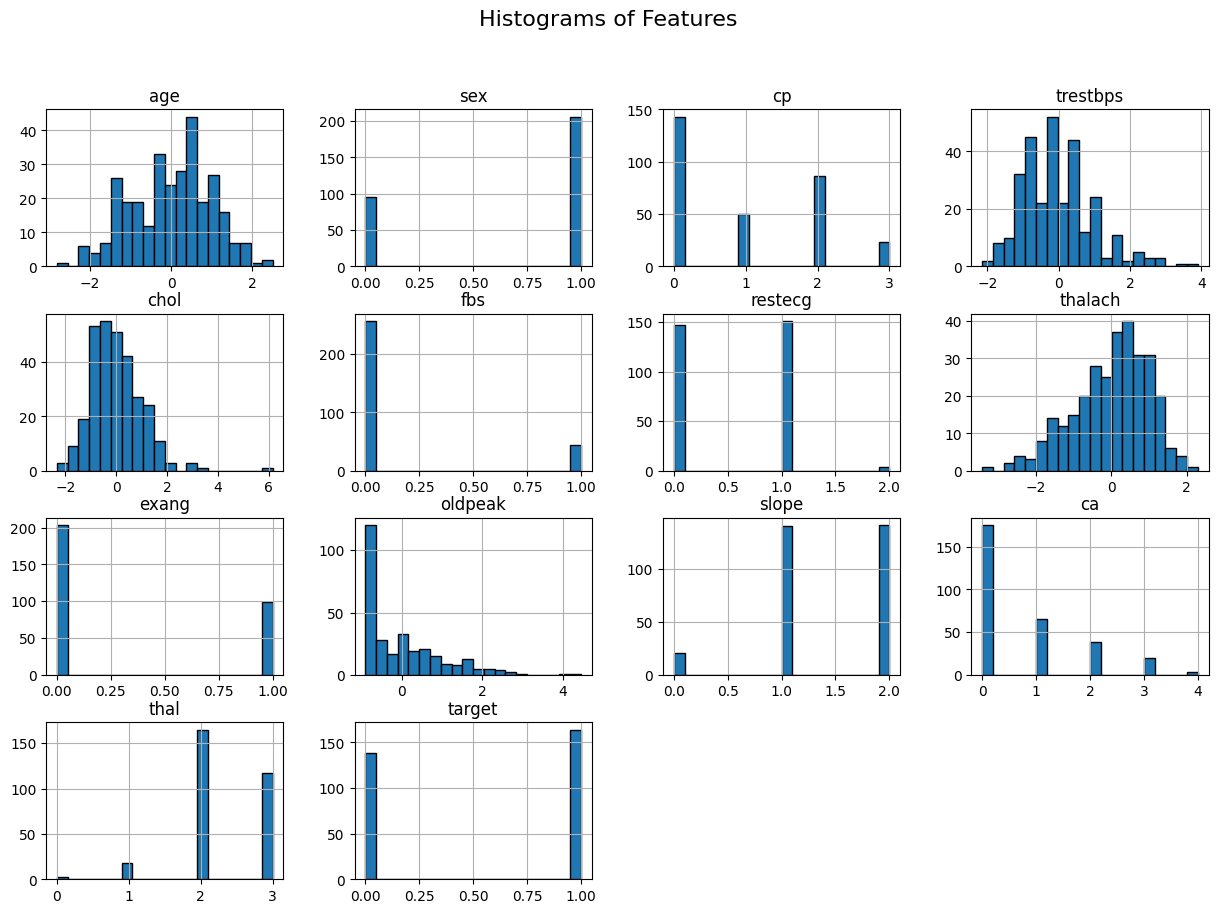

In [177]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

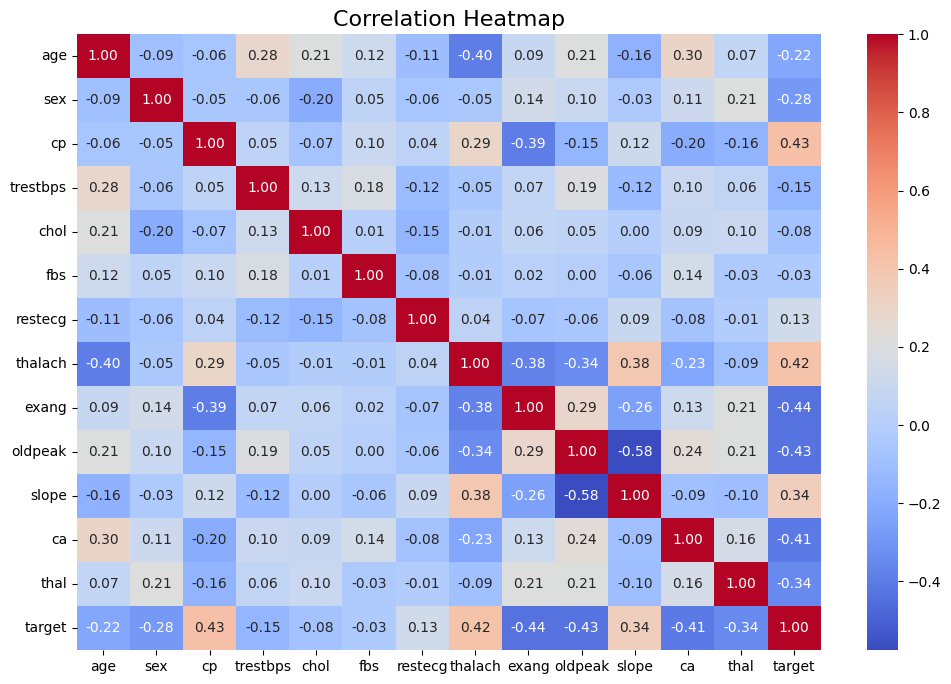

In [178]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1928\3297241630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1928\3297241630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1928\3297241630.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y=col, data=df, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1928\3297241630.py:5: FutureWar

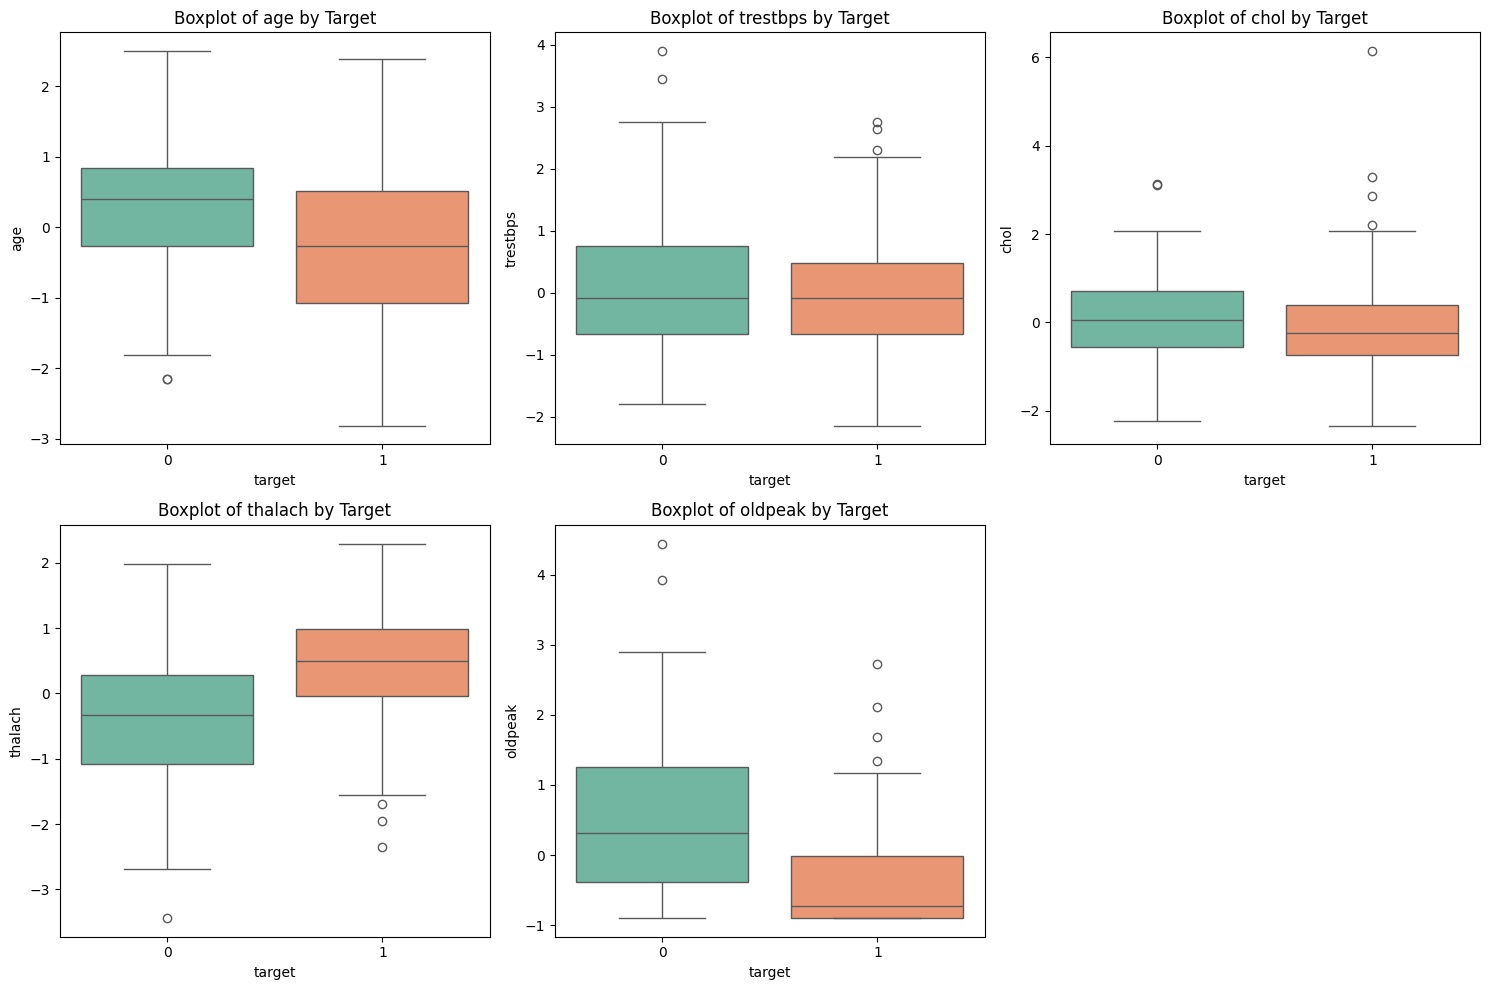

In [179]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(["age", "trestbps", "chol", "thalach", "oldpeak"]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="target", y=col, data=df, palette="Set2")
    plt.title(f"Boxplot of {col} by Target")

plt.tight_layout()
plt.show()


In [180]:
# Save cleaned data
df.to_csv("../data/heart_disease_cleaned.csv", index=False)